#  Sampling from a discrete distribution

##### Keywords: discrete sampling, MCMC, metropolis, poisson distribution, proposal matrix, 

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

In simulated annealing, we carried out combinatorical oprimization by sampling from a state space where each state was a vector of baseball simulation features.

Since Metropolis MCMC is the same algorithm, it should be clear that its possible to simulate discrete possibilities in MCMC as long as you choose proposals which satisfy detailed balance. 

As an example, consider simulating a poisson distribution. Since its discrete, the proposal wont be a continuous $q(x,y)$ (the proposal probability to go from y to x), but rather a matrix indexed by a variable that corresponds to (indexes) the various states that can be obtained.

In [30]:
def metropolis(p, qdraw, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
            accepted+=1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

## Example: Sampling a Poisson

The poisson pmf is:

$$p(k) = e^{-\mu}\frac{\mu^k}{k!}.$$

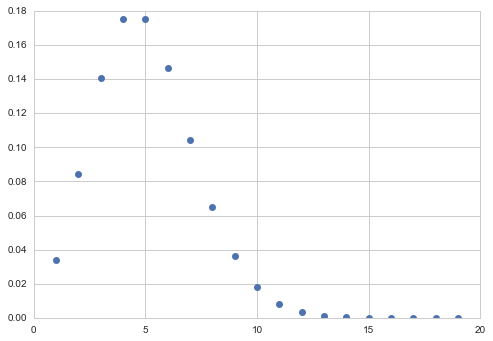

In [12]:
from scipy.stats import poisson
xxx= np.arange(1,20,1)
plt.plot(xxx, poisson.pmf(xxx, mu=5), 'o'); 

To sample from this distribution, we must create a proposal matrix which allows us to go from any integer output to any other in a finite number of steps. This matrix must be symmetric, since we wish to use Metropolis.

A simple such matrix, which is although a bit slow, would be one which has immediate off-diagonal elements (from Stats 580 at Iowa state..)

![](images/propmatrix.png)

In [13]:
def prop_pdf(ito, ifrom):
    if ito == ifrom - 1:
        return 0.5
    elif ito == ifrom + 1:
        return 0.5
    elif ito == ifrom and ito == 0:#needed to make first row sum to 1
        return 0.5
    else:
        return 0

In [20]:
def prop_draw(ifrom):
    u = np.random.uniform()
    if ifrom !=0:
        if u < 1/2:
            ito = ifrom -1
        else:
            ito = ifrom + 1
    else:
        if u < 1/2:
            ito=0
        else:
            ito=1
    return ito

In [31]:
rv = poisson(5)
samps, acc = metropolis(rv.pmf, prop_draw, 50000, 1)

In [32]:
acc

41463

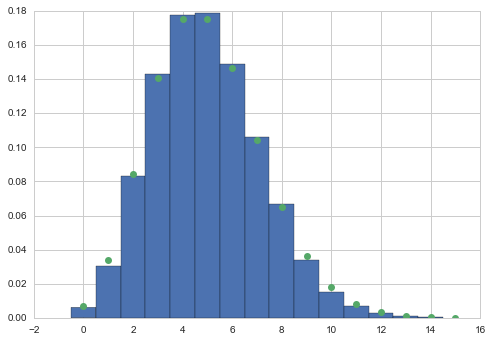

In [33]:
xxx = np.arange(0,samps.max())
plt.hist(samps, bins=xxx, normed=True, align='left');
plt.plot(xxx, rv.pmf(xxx),'o');